# Pneumonia detection Challenge form Kaggle

In [2]:
# Import necessary modules and libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

In [3]:
# Set up path to keep the dataset at
data_path = Path('data')
data_file = data_path/'pneumonia_dataset'


# We have a downloaded zip file of dataset. It will extract the zip file unless it is already extracted and the directory exists. 
if data_file.is_dir():
    print('Directory already exists. Skipping zip file extraction....')
else:
    with zipfile.ZipFile(data_path/'rsna-pneumonia-detection-challenge.zip', 'r') as zip_ref:
        zip_ref.extractall(data_file)

Directory already exists. Skipping zip file extraction....


In [4]:
# See the number of files and directories in the folder where we have the dataset 
import os

for path, directory, files in os.walk(data_file):
    print(f'In path: "{path}", there are {len(directory)} directory and {len(files)} files')

In path: "data\pneumonia_dataset", there are 2 directory and 4 files
In path: "data\pneumonia_dataset\stage_2_test_images", there are 0 directory and 3000 files
In path: "data\pneumonia_dataset\stage_2_train_images", there are 0 directory and 26684 files


In [5]:
# Get and store all the path for the train and test data. Also `all_images_path` variable to store all the paths for all data (train and test data)

train_images_path = list(data_file.glob('stage_2_train_images/*.dcm'))
test_images_path = list(data_file.glob('stage_2_test_images/*.dcm'))
all_images_path = list(data_file.glob('*/*.dcm'))

In [6]:
print(f'Total number of Training Data: {len(train_images_path)} \nTotal number of Testing Data: {len(test_images_path)}\nTotal number of Data: {len(all_images_path)}')

Total number of Training Data: 26684 
Total number of Testing Data: 3000
Total number of Data: 29684


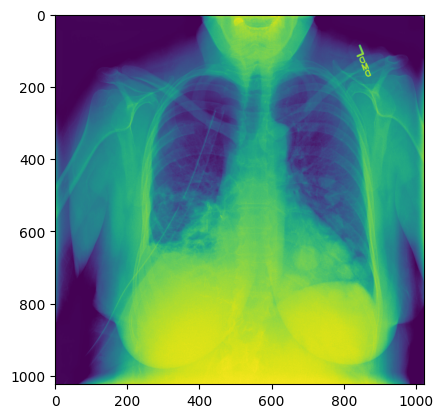

In [7]:
# Print out a sample data

import pydicom

image = pydicom.dcmread(train_images_path[0])
image_pixel = image.pixel_array
plt.imshow(image_pixel)

In [8]:
# File path of the labels

train_labels_file = data_file/'stage_2_train_labels.csv'
train_labels_file

WindowsPath('data/pneumonia_dataset/stage_2_train_labels.csv')

## Working with label documnet of test images with is a CSV file with python built in `csv` module

In [9]:
# We create patient ID list and labels list for the pattient ID and their respective labels
patientID_list = []
all_labels_list = []


import csv
# label file is in '.csv' extension. reading the csv file and extracting all the labels and storing them in a list

with open(train_labels_file,) as csvfile:
    csv_reader = csv.reader(csvfile)

    # Calling this will also store the header of the CSV file in the `header` variable and the next time we call `csv_reader` we will have directly access to the data values i.e the second row
    header = next(csv_reader)
    print(header)

    label_index = header.index('Target')

    patientID_index = header.index('patientId')

    for row in csv_reader:
        
        labels = int(row[label_index])

        patientID = row[patientID_index]

        all_labels_list.append(labels)
        patientID_list.append(patientID)

['patientId', 'x', 'y', 'width', 'height', 'Target']


In [10]:


print(f'Total number of Training Data: {len(train_images_path)} \nTotal number of Testing Data: {len(test_images_path)}\n\nTotal number of Data: {len(all_images_path)}')

print(f'\nTotal number of Labels: {len(all_labels_list)}')

Total number of Training Data: 26684 
Total number of Testing Data: 3000

Total number of Data: 29684

Total number of Labels: 30227


In [53]:
# Get the list of all the patient Id from the training and testing data and see how it corresponds to the label CSV file

x = 0
train_data_patientID_list = []

image_path = train_images_path[2]
print(image_path)

image = pydicom.dcmread(image_path)
image_pixel = image.pixel_array
patientID = image.PatientID 
# plt.imshow(image_pixel)
print(patientID+'\n'+patientID_list[1])

patientID == patientID_list[1]


# for x in range(len(train_images_path)):
#     image_path = train_images_path[x]
#     image = pydicom.dcmread(image_path)
#     patientID = image.PatientID
#     print(patientID, patientID_list[x])
#     if patientID == patientID_list[x]:
#         print(x)
#         break


# print('the loop didnt break')

data\pneumonia_dataset\stage_2_train_images\000db696-cf54-4385-b10b-6b16fbb3f985.dcm
000db696-cf54-4385-b10b-6b16fbb3f985
00313ee0-9eaa-42f4-b0ab-c148ed3241cd


False

In [63]:
# Reading the csv file with pandas

import pandas as pd

df_label = pd.DataFrame(all_labels_list)

df_id = pd.DataFrame(patientID_list, all_labels_list)
df_id[:5]


,0
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6
0,00313ee0-9eaa-42f4-b0ab-c148ed3241cd
0,00322d4d-1c29-4943-afc9-b6754be640eb
0,003d8fa0-6bf1-40ed-b54c-ac657f8495c5
1,00436515-870c-4b36-a041-de91049b9ab4


In [ ]:
df = pd.read_csv()

In [12]:
# Checking the content of the detailed label CSV file

detail_label_file_path = data_file/'stage_2_detailed_class_info.csv'
detail_label_file_path

import csv

with open(detail_label_file_path) as csv_file:
    csv_reader =  csv.reader(csv_file)
    header = next(csv_reader)
    print(header)
    for row in csv_reader:
        print(row)
        print(row[0] == patientID_list[0])
        # print(row[0] == train_data_patientID_list[0])
        print(row[0] == patientID)
        break


['patientId', 'class']
['0004cfab-14fd-4e49-80ba-63a80b6bddd6', 'No Lung Opacity / Not Normal']
True
False


In [13]:
# all_images_path[-1]

image_path = all_images_path[-1]

image = pydicom.dcmread(image_path)
patientID = image.PatientID
patientID, all_images_path[-1]

('fffec09e-8a4a-48b1-b33e-ab4890ccd136',
 WindowsPath('data/pneumonia_dataset/stage_2_train_images/fffec09e-8a4a-48b1-b33e-ab4890ccd136.dcm'))

In [14]:
len(all_images_path)

29684

## Working with label document of test images which is a CSV file with `pandas`

In [15]:
import random

rand_int_list = random.sample(range(len(train_images_path)), k=27)
rand_int_list


[6708,
 10091,
 10383,
 918,
 11384,
 10418,
 22866,
 16328,
 26026,
 10866,
 22618,
 17413,
 1792,
 15608,
 17884,
 9722,
 19130,
 12552,
 21419,
 16686,
 10021,
 1101,
 5386,
 20984,
 4762,
 12494,
 15193]

In [16]:
labels_dict = {0: 'Absent',
               1: 'Present'}

min(all_labels_list), max(all_labels_list)

(0, 1)

In [17]:
labels_dict[0], labels_dict[1]

('Absent', 'Present')

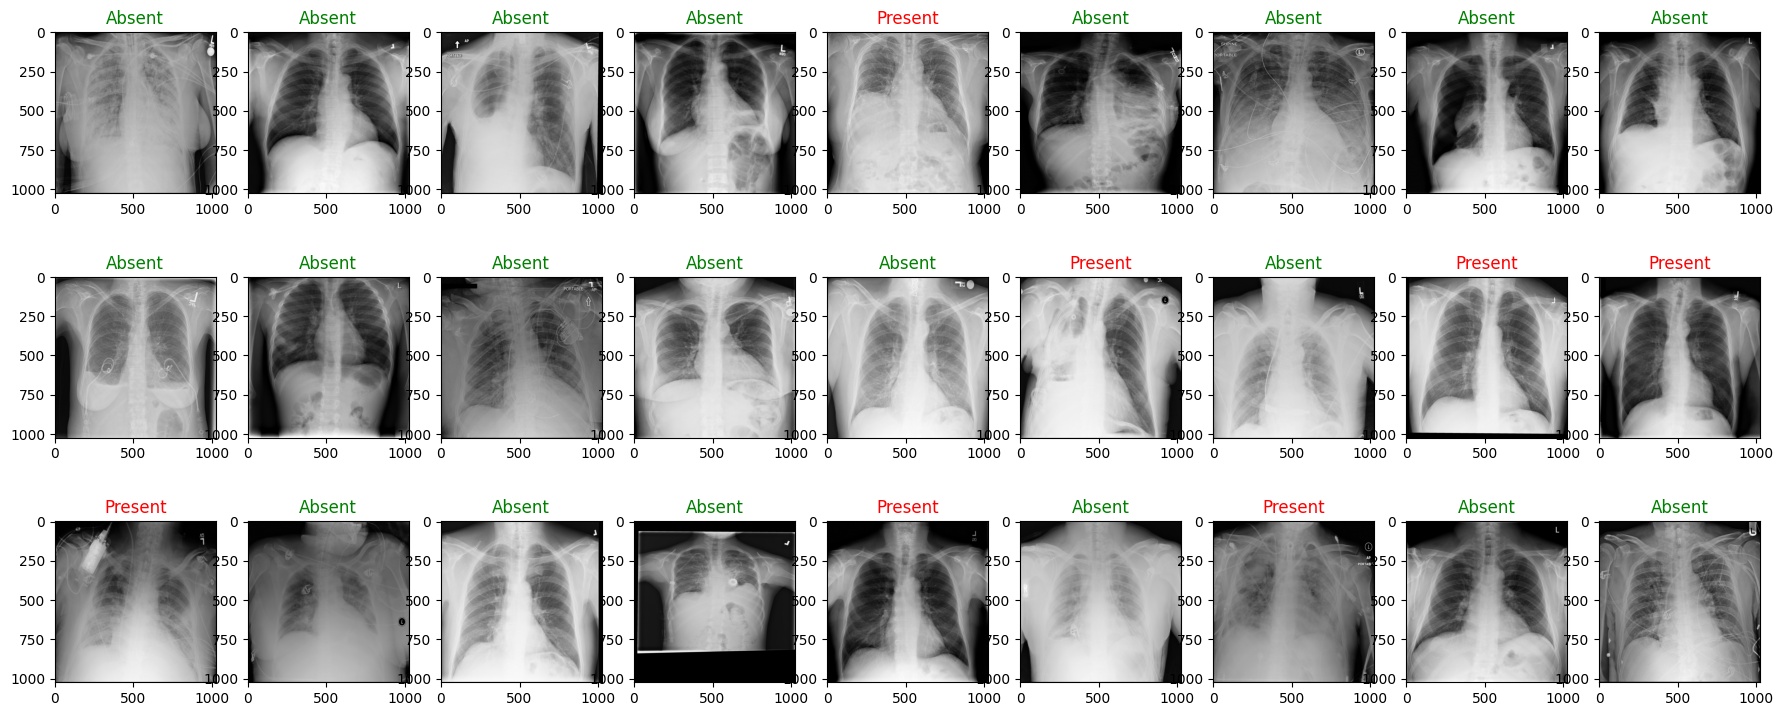

In [18]:
plt.figure(figsize=(22, 9))

for i in range(len(rand_int_list)):
    plt.subplot(3, 9, i+1)

    random_int = rand_int_list[i]
    
    image_path = train_images_path[random_int]
    image = pydicom.dcmread(image_path)
    image_pixel = image.pixel_array

    plt.imshow(image_pixel, cmap='gray')
    image_label = all_labels_list[random_int]

    title_color = 'green' if image_label == 0 else 'red'

    plt.title(labels_dict[image_label], color=title_color)
